#### 1- Path and environment setup

In [19]:
# Path and environment setup

import sys
from pathlib import Path

project_root = next(
    p for p in Path().resolve().parents
    if (p / "scripts").exists()
)
sys.path.insert(0, str(project_root))



#### 2- Imports libraries

In [ ]:
# Imports libraries

from scripts.bq_tool import run_bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#### 2-  Configuration (SQL, constants)

In [ ]:
sql = """
SELECT
  table_name
FROM `bigquery-public-data.new_york_taxi_trips.INFORMATION_SCHEMA.TABLES`
ORDER BY table_name
"""
df = run_bigquery(sql)
df

Running SQL at: 2025-12-21T00:26:37.423355

SELECT
  table_name
FROM `bigquery-public-data.new_york_taxi_trips.INFORMATION_SCHEMA.TABLES`
ORDER BY table_name



,table_name
0,taxi_zone_geom
1,tlc_fhv_trips_2015
2,tlc_fhv_trips_2016
3,tlc_fhv_trips_2017
4,tlc_green_trips_2014
5,tlc_green_trips_2015
6,tlc_green_trips_2016
7,tlc_green_trips_2017
8,tlc_green_trips_2018
9,tlc_green_trips_2019


In [61]:
sql = """
SELECT
  column_name,
  data_type
FROM `bigquery-public-data.new_york_taxi_trips.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'tlc_yellow_trips_2022'
ORDER BY ordinal_position
"""
df = run_bigquery(sql)
df

Running SQL at: 2025-12-21T01:08:32.490636

SELECT
  column_name,
  data_type
FROM `bigquery-public-data.new_york_taxi_trips.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'tlc_yellow_trips_2022'
ORDER BY ordinal_position



,column_name,data_type
0,vendor_id,STRING
1,pickup_datetime,TIMESTAMP
2,dropoff_datetime,TIMESTAMP
3,passenger_count,INT64
4,trip_distance,NUMERIC
5,rate_code,STRING
6,store_and_fwd_flag,STRING
7,payment_type,STRING
8,fare_amount,NUMERIC
9,extra,NUMERIC


In [64]:
SQL = """
SELECT COUNT(*) AS row_count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
"""
df_count = run_bigquery(SQL)
df_count



Running SQL at: 2025-12-21T01:11:57.611193

SELECT COUNT(*) AS row_count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`



,row_count
0,36256539


In [101]:
SQL = """
SELECT *
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
ORDER BY RAND()
LIMIT 10000
"""
df = run_bigquery(SQL)
df.head()


Running SQL at: 2025-12-21T15:57:18.965077

SELECT *
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
ORDER BY RAND()
LIMIT 10000



,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2022-03-02 15:25:57+00:00,2022-03-02 16:13:13+00:00,5,12.630000000,1.0,N,2,43.000000000,0E-9,0.500000000,0E-9,0E-9,0.300000000,1.250000000,45.050000000,132,181,2022,3
1,2,2022-04-16 14:36:18+00:00,2022-04-16 14:47:08+00:00,4,2.150000000,1.0,N,1,10.000000000,0E-9,0.500000000,2.660000000,0E-9,0.300000000,0E-9,15.960000000,142,236,2022,4
2,1,2022-04-26 14:48:06+00:00,2022-04-26 15:14:38+00:00,1,3.200000000,1.0,N,1,18.000000000,2.500000000,0.500000000,2.000000000,0E-9,0.300000000,0E-9,23.300000000,236,100,2022,4
3,1,2022-05-10 11:39:15+00:00,2022-05-10 11:48:34+00:00,1,1.100000000,1.0,N,1,7.500000000,2.500000000,0.500000000,2.150000000,0E-9,0.300000000,0E-9,12.950000000,161,170,2022,5
4,1,2022-06-06 15:43:05+00:00,2022-06-06 15:45:30+00:00,1,0.600000000,1.0,N,1,4.000000000,2.500000000,0.500000000,1.450000000,0E-9,0.300000000,0E-9,8.750000000,237,237,2022,6


In [ ]:
# df.to_csv("../data/yellow_tripdata_sample.csv", index=False)

# import pandas as pd
# df_check = pd.read_csv("../data/yellow_tripdata_sample.csv")
# df_check.head()


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2022-03-02 15:25:57+00:00,2022-03-02 16:13:13+00:00,5.0,12.63,1.0,N,2,43.0,0.0,0.5,0.00,0.0,0.3,1.25,45.05,132,181,2022,3
1,2,2022-04-16 14:36:18+00:00,2022-04-16 14:47:08+00:00,4.0,2.15,1.0,N,1,10.0,0.0,0.5,2.66,0.0,0.3,0.00,15.96,142,236,2022,4
2,1,2022-04-26 14:48:06+00:00,2022-04-26 15:14:38+00:00,1.0,3.20,1.0,N,1,18.0,2.5,0.5,2.00,0.0,0.3,0.00,23.30,236,100,2022,4
3,1,2022-05-10 11:39:15+00:00,2022-05-10 11:48:34+00:00,1.0,1.10,1.0,N,1,7.5,2.5,0.5,2.15,0.0,0.3,0.00,12.95,161,170,2022,5
4,1,2022-06-06 15:43:05+00:00,2022-06-06 15:45:30+00:00,1.0,0.60,1.0,N,1,4.0,2.5,0.5,1.45,0.0,0.3,0.00,8.75,237,237,2022,6


#### 5- EDA and plots

In [66]:
# EDA / plots
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   vendor_id            5000 non-null   object             
 1   pickup_datetime      5000 non-null   datetime64[us, UTC]
 2   dropoff_datetime     5000 non-null   datetime64[us, UTC]
 3   passenger_count      4823 non-null   Int64              
 4   trip_distance        5000 non-null   object             
 5   rate_code            4823 non-null   object             
 6   store_and_fwd_flag   4823 non-null   object             
 7   payment_type         5000 non-null   object             
 8   fare_amount          5000 non-null   object             
 9   extra                5000 non-null   object             
 10  mta_tax              5000 non-null   object             
 11  tip_amount           5000 non-null   object             
 12  tolls_amount        

In [ ]:
df.describe(include="all")
#df.describe(include="all").T

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month,hour,weekday
count,5000,5000,5000,4823.0,5000,4823,4823,5000,5000,5000,...,5000,5000,4823,5000,5000,5000,5000.0,5000.0,5000.000000,5000
unique,3,NaN,NaN,<NA>,1064,6,2,5,293,19,...,21,3,3,987,113,174,<NA>,<NA>,NaN,7
top,2,NaN,NaN,<NA>,1.000000000,1.0,N,1,7.000000000,0E-9,...,0E-9,0.300000000,0E-9,11.300000000,237,236,<NA>,<NA>,NaN,Wednesday
freq,3541,NaN,NaN,<NA>,83,4536,4762,3755,237,2071,...,4613,4971,4459,86,245,219,<NA>,<NA>,NaN,801
mean,NaN,2022-06-18 21:41:53.928200+00:00,2022-06-18 21:58:43.406200+00:00,1.389592,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,6.0772,14.193400,NaN
min,NaN,2022-01-01 00:25:01+00:00,2022-01-01 00:33:55+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,1.0,0.000000,NaN
25%,NaN,2022-03-30 13:20:55+00:00,2022-03-30 14:55:39.250000+00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,3.0,10.000000,NaN
50%,NaN,2022-06-14 14:24:07.500000+00:00,2022-06-14 14:57:14.500000+00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,6.0,15.000000,NaN
75%,NaN,2022-09-10 10:10:05.500000+00:00,2022-09-10 10:21:18.750000+00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,9.0,19.000000,NaN
max,NaN,2022-11-30 23:44:02+00:00,2022-11-30 23:57:01+00:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,11.0,23.000000,NaN


In [83]:
# Fix numeric dtypes

numeric_cols = [
    "trip_distance",
    "fare_amount",
    "extra",
    "mta_tax",
    "tip_amount",
    "tolls_amount",
    "imp_surcharge",
    "airport_fee",
    "total_amount",
]

df[numeric_cols] = df[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)

# Imports and setup for Altair
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import altair as alt
import altair_ally as aly

alt.data_transformers.disable_max_rows()

numeric_df = df.select_dtypes(include="number")
numeric_df.head()
aly.dist(numeric_df)


alt.ConcatChart(...)

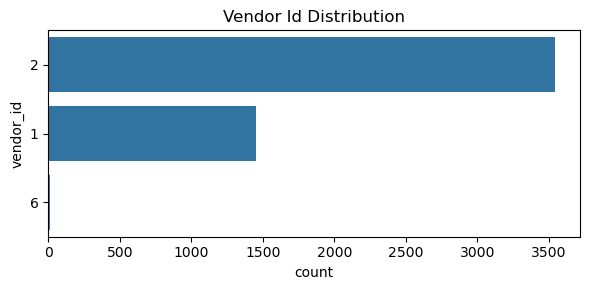

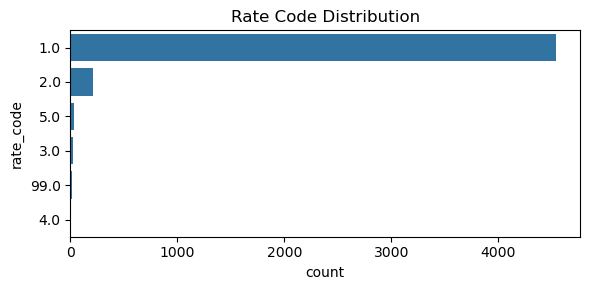

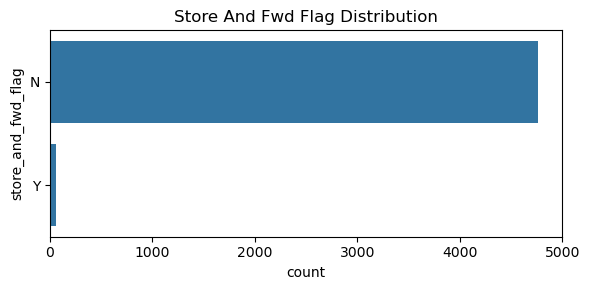

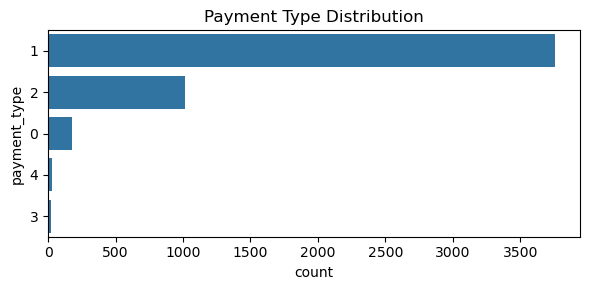

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = [
    "vendor_id",
    "rate_code",
    "store_and_fwd_flag",
    "payment_type",
]

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(
        data=df,
        y=col,
        order=df[col].value_counts().index
    )
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
    plt.tight_layout()
    plt.show()


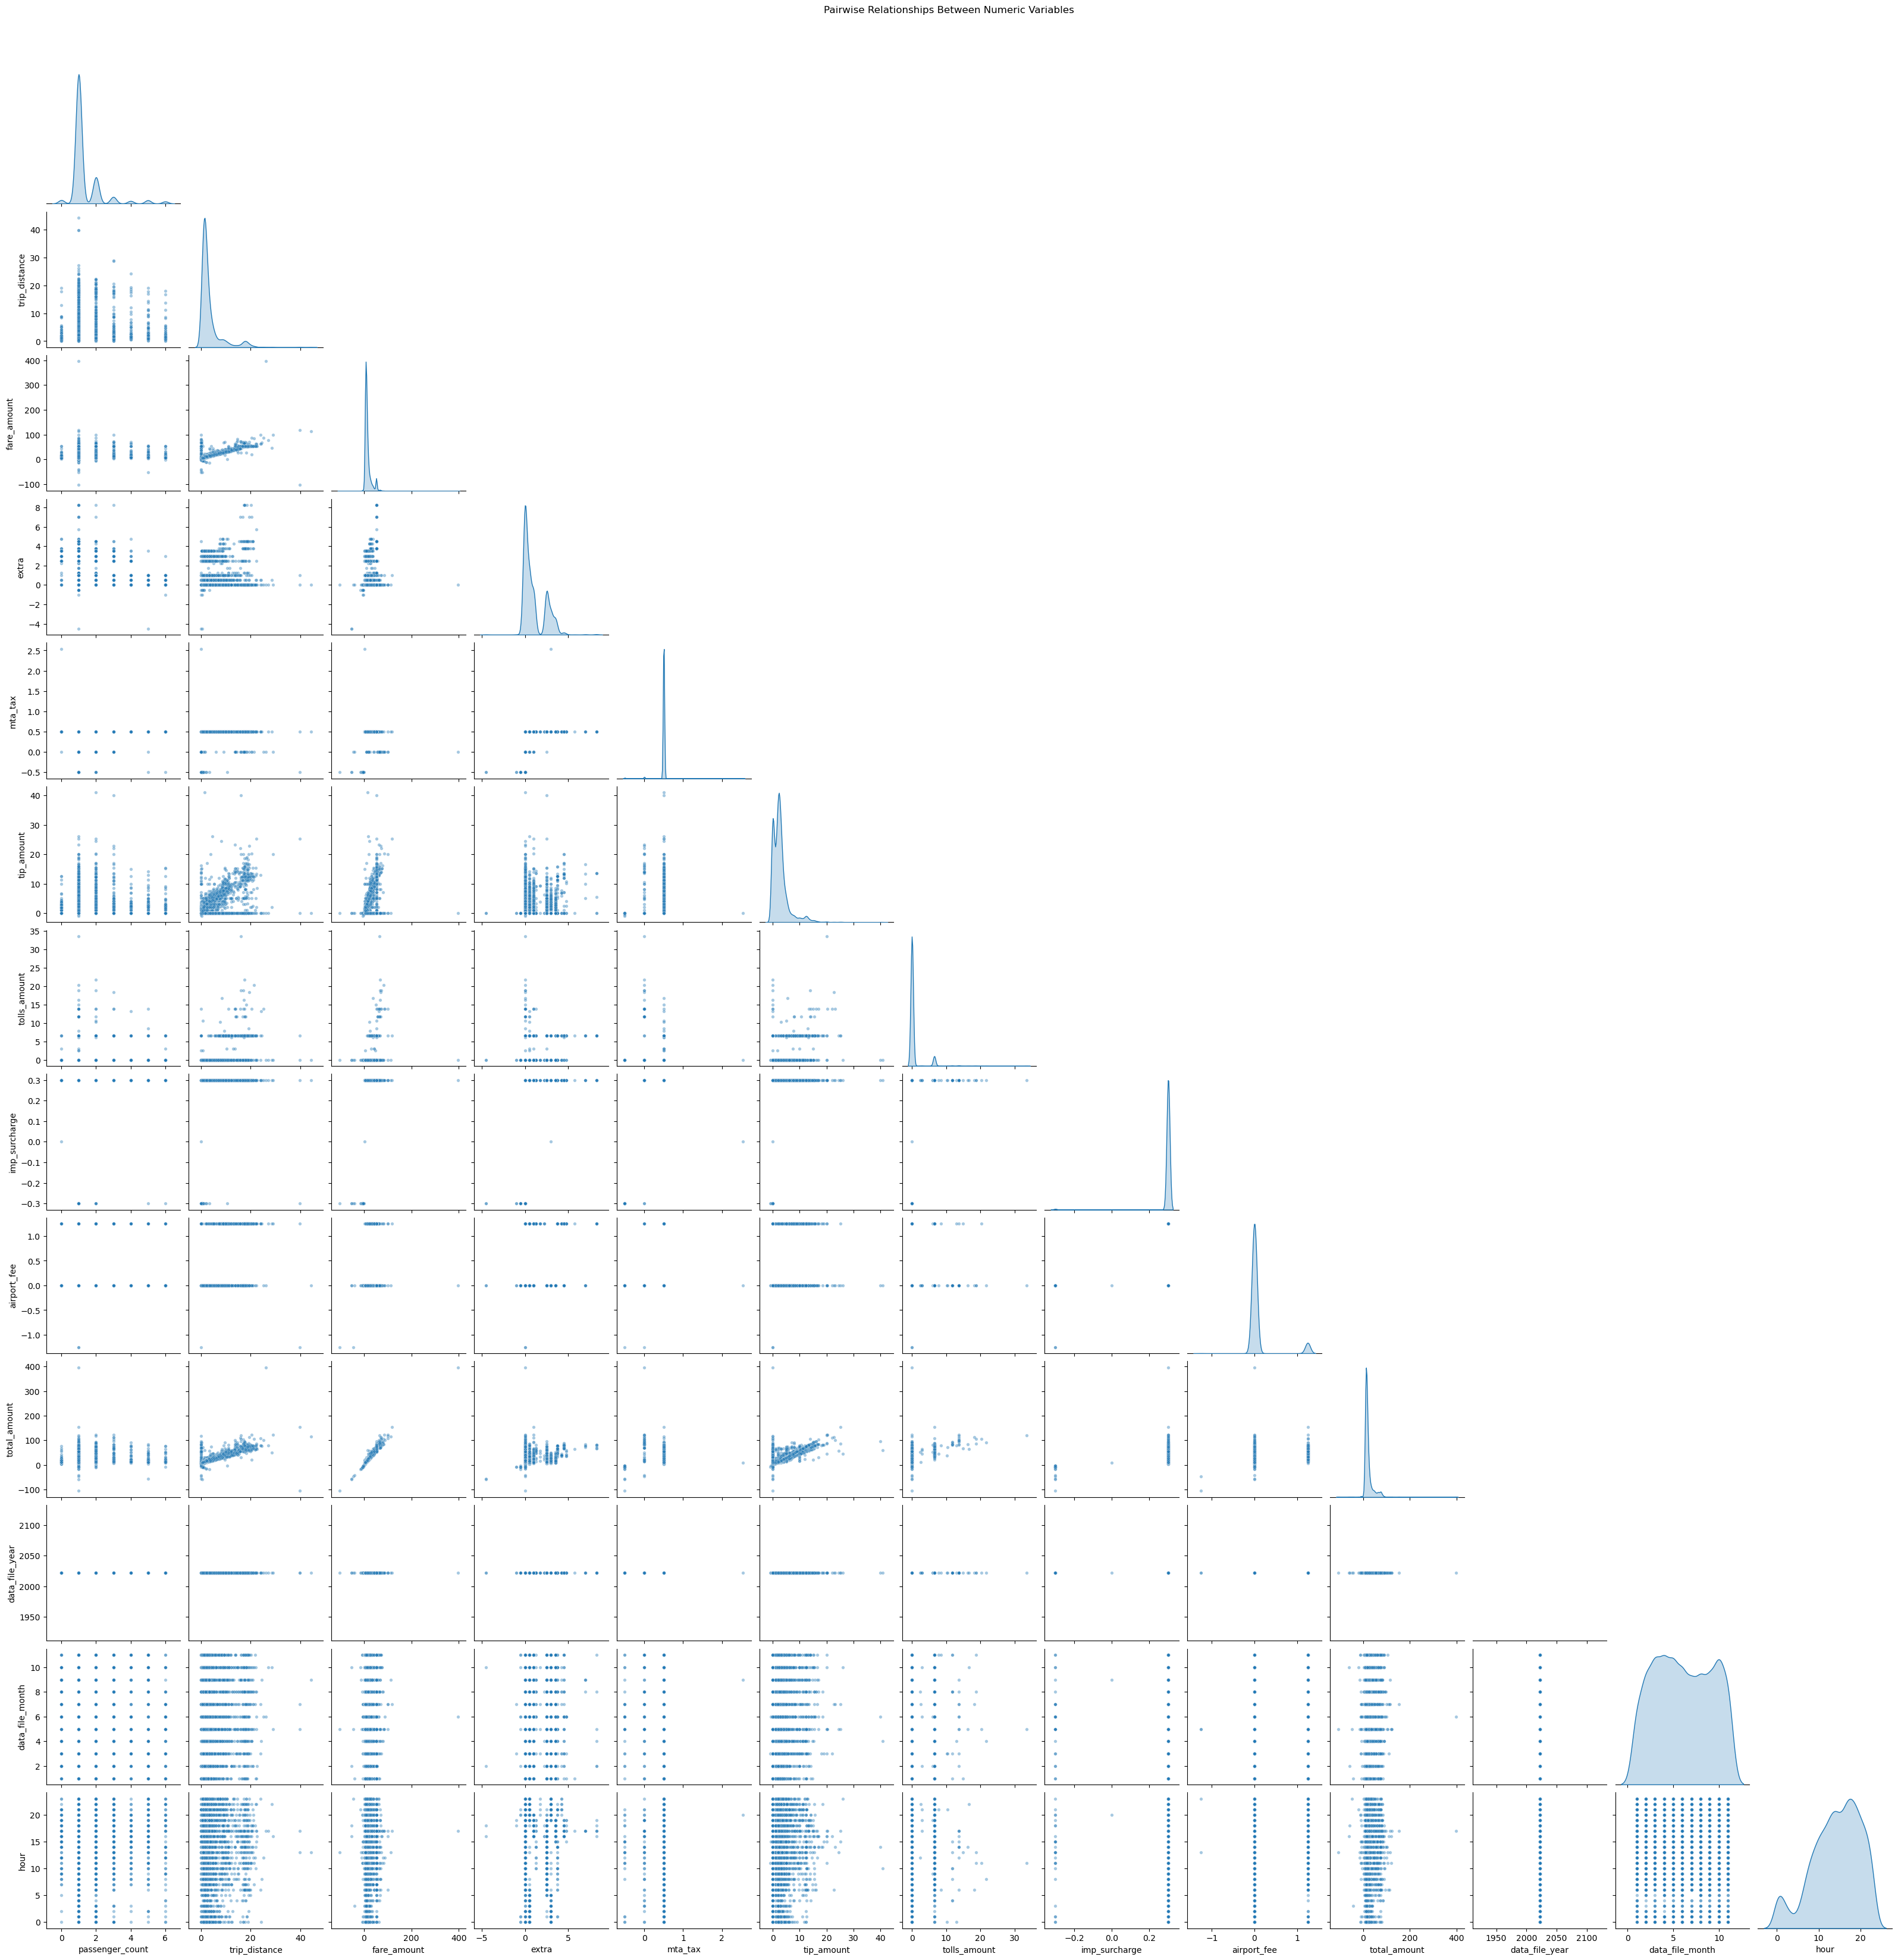

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    numeric_df,
    corner=True,        # lower triangle only
    diag_kind="kde",    # density on diagonal
    plot_kws={"alpha": 0.4, "s": 15}  # readability for dense data
)

plt.suptitle("Pairwise Relationships Between Numeric Variables", y=1.02)
plt.show()

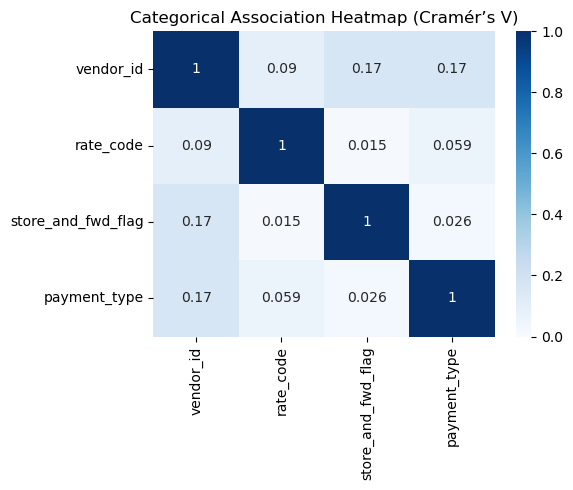

In [94]:
# ======================================
# CATEGORICAL ASSOCIATION (CRAMÉR'S V)
# ======================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1️⃣ Define categorical columns (LOW cardinality only)

# 2️⃣ Cramér’s V function
def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.sum().sum()
    r, k = contingency.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# 3️⃣ Build association matrix
cramer_matrix = pd.DataFrame(
    index=categorical_cols,
    columns=categorical_cols,
    dtype=float
)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# 4️⃣ Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cramer_matrix,
    annot=True,
    cmap="Blues",
    vmin=0,
    vmax=1
)
plt.title("Categorical Association Heatmap (Cramér’s V)")
plt.tight_layout()
plt.show()


In [99]:
import altair as alt
import altair_ally as aly
import pandas as pd

alt.data_transformers.disable_max_rows()


df[numeric_cols] = df[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)

numeric_df = df[numeric_cols]

# Spearman correlation (best for skewed data)
corr_df = numeric_df.corr(method="spearman")

# Altair correlation heatmap
aly.corr(corr_df)


alt.ConcatChart(...)

In [71]:
# Passenger counts
df["passenger_count"].value_counts(dropna=False).sort_index()

# Trip distance
df["trip_distance"].describe()

# Fare / totals
df[["fare_amount", "total_amount", "tip_amount"]].describe()


,fare_amount,total_amount,tip_amount
count,5000,5000,5000
unique,293,987,578
top,7.000000000,11.300000000,0E-9
freq,237,86,1227


In [72]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

df["hour"] = df["pickup_datetime"].dt.hour
df["weekday"] = df["pickup_datetime"].dt.day_name()

df["hour"].value_counts().sort_index()
df["weekday"].value_counts()


weekday
Wednesday    801
Friday       770
Saturday     746
Thursday     715
Tuesday      698
Monday       654
Sunday       616
Name: count, dtype: int64

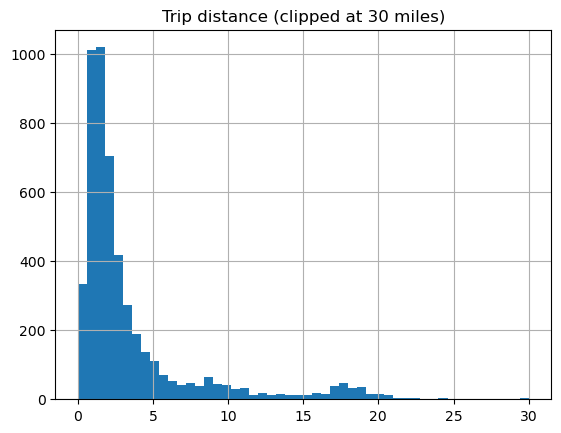

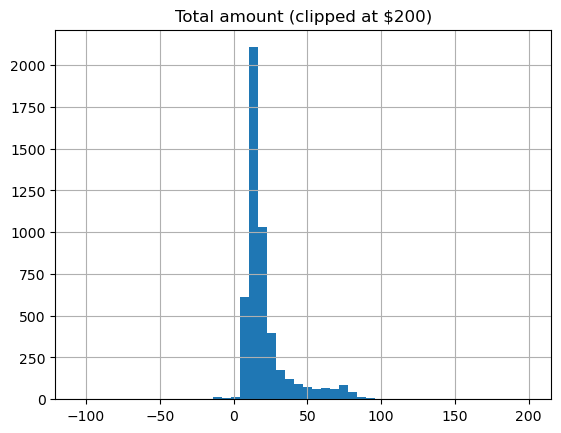

In [73]:
import matplotlib.pyplot as plt

df["trip_distance"].clip(upper=30).hist(bins=50)
plt.title("Trip distance (clipped at 30 miles)")
plt.show()

df["total_amount"].clip(upper=200).hist(bins=50)
plt.title("Total amount (clipped at $200)")
plt.show()
